In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

In [2]:
DEVICE = torch.device("cpu")

In [3]:
EPOCHS = 100
BATCH_SIZE = 64

In [4]:

train_loader = torch.utils.data.DataLoader(
    datasets.CIFAR100('./.data',train=True,download=True,
                     transform=transforms.Compose([
                         transforms.RandomCrop(32, padding=4),transforms.RandomHorizontalFlip(),
                         transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5),
                                                                    (0.5, 0.5, 0.5))])),
    batch_size=BATCH_SIZE, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.CIFAR100('./.data',train=False,
                     transform=transforms.Compose([
                         transforms.ToTensor(),
                         transforms.Normalize((0.5, 0.5, 0.5),
                                              (0.5, 0.5, 0.5))])),
    batch_size=BATCH_SIZE, shuffle=True)



Files already downloaded and verified


In [5]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(20 * 5 * 5, 500) #
        self.fc2 = nn.Linear(500, 100) #
        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 20 * 5 * 5) #
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x


In [6]:
model = CNN()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [7]:
train_losses = []
test_losses = []

def train(model, train_loader, optimizer, epoch):
    model.train()
    total_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to('cpu'), target.to('cpu')
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        
        if batch_idx % 200 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    
    #epoch에 대한 평균 training loss 계산
    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)


In [8]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to('cpu'), target.to('cpu')
            output = model(data)
#batch에 따른 test loss 더하기
            loss = F.cross_entropy(output, target)
            test_loss += loss.item()
           
# 가장 높은 값을 가진 인덱스가 바로 예측값
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
        
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy



Train Epoch: 1 [0/50000 (0%)]	Loss: 4.617059
Train Epoch: 1 [12800/50000 (26%)]	Loss: 4.591955
Train Epoch: 1 [25600/50000 (51%)]	Loss: 4.595852
Train Epoch: 1 [38400/50000 (77%)]	Loss: 4.608289
[1] Test Loss: 0.0722, Accuracy: 1.31%
Train Epoch: 2 [0/50000 (0%)]	Loss: 4.585381
Train Epoch: 2 [12800/50000 (26%)]	Loss: 4.604612
Train Epoch: 2 [25600/50000 (51%)]	Loss: 4.555217
Train Epoch: 2 [38400/50000 (77%)]	Loss: 4.547250
[2] Test Loss: 0.0708, Accuracy: 1.60%
Train Epoch: 3 [0/50000 (0%)]	Loss: 4.520984
Train Epoch: 3 [12800/50000 (26%)]	Loss: 4.563214
Train Epoch: 3 [25600/50000 (51%)]	Loss: 4.569318
Train Epoch: 3 [38400/50000 (77%)]	Loss: 4.429648
[3] Test Loss: 0.0694, Accuracy: 3.45%
Train Epoch: 4 [0/50000 (0%)]	Loss: 4.542250
Train Epoch: 4 [12800/50000 (26%)]	Loss: 4.474126
Train Epoch: 4 [25600/50000 (51%)]	Loss: 4.460233
Train Epoch: 4 [38400/50000 (77%)]	Loss: 4.409715
[4] Test Loss: 0.0674, Accuracy: 6.12%
Train Epoch: 5 [0/50000 (0%)]	Loss: 4.429903
Train Epoch: 5 [128

Train Epoch: 35 [25600/50000 (51%)]	Loss: 3.493630
Train Epoch: 35 [38400/50000 (77%)]	Loss: 3.590420
[35] Test Loss: 0.0546, Accuracy: 22.02%
Train Epoch: 36 [0/50000 (0%)]	Loss: 3.534550
Train Epoch: 36 [12800/50000 (26%)]	Loss: 3.619124
Train Epoch: 36 [25600/50000 (51%)]	Loss: 3.653360
Train Epoch: 36 [38400/50000 (77%)]	Loss: 3.554781
[36] Test Loss: 0.0547, Accuracy: 22.12%
Train Epoch: 37 [0/50000 (0%)]	Loss: 3.775198
Train Epoch: 37 [12800/50000 (26%)]	Loss: 3.555534
Train Epoch: 37 [25600/50000 (51%)]	Loss: 3.808083
Train Epoch: 37 [38400/50000 (77%)]	Loss: 3.721452
[37] Test Loss: 0.0544, Accuracy: 23.10%
Train Epoch: 38 [0/50000 (0%)]	Loss: 3.761412
Train Epoch: 38 [12800/50000 (26%)]	Loss: 3.410491
Train Epoch: 38 [25600/50000 (51%)]	Loss: 3.839189
Train Epoch: 38 [38400/50000 (77%)]	Loss: 3.838210
[38] Test Loss: 0.0545, Accuracy: 22.83%
Train Epoch: 39 [0/50000 (0%)]	Loss: 3.632338
Train Epoch: 39 [12800/50000 (26%)]	Loss: 3.523971
Train Epoch: 39 [25600/50000 (51%)]	Loss

Train Epoch: 69 [38400/50000 (77%)]	Loss: 3.687983
[69] Test Loss: 0.0518, Accuracy: 25.81%
Train Epoch: 70 [0/50000 (0%)]	Loss: 3.361279
Train Epoch: 70 [12800/50000 (26%)]	Loss: 3.381109
Train Epoch: 70 [25600/50000 (51%)]	Loss: 3.527292
Train Epoch: 70 [38400/50000 (77%)]	Loss: 3.426471
[70] Test Loss: 0.0524, Accuracy: 26.19%
Train Epoch: 71 [0/50000 (0%)]	Loss: 3.799006
Train Epoch: 71 [12800/50000 (26%)]	Loss: 3.578059
Train Epoch: 71 [25600/50000 (51%)]	Loss: 3.375019
Train Epoch: 71 [38400/50000 (77%)]	Loss: 3.631826
[71] Test Loss: 0.0517, Accuracy: 25.92%
Train Epoch: 72 [0/50000 (0%)]	Loss: 3.829349
Train Epoch: 72 [12800/50000 (26%)]	Loss: 3.237147
Train Epoch: 72 [25600/50000 (51%)]	Loss: 3.527563
Train Epoch: 72 [38400/50000 (77%)]	Loss: 3.331606
[72] Test Loss: 0.0519, Accuracy: 26.72%
Train Epoch: 73 [0/50000 (0%)]	Loss: 3.480602
Train Epoch: 73 [12800/50000 (26%)]	Loss: 3.616325
Train Epoch: 73 [25600/50000 (51%)]	Loss: 3.443032
Train Epoch: 73 [38400/50000 (77%)]	Loss

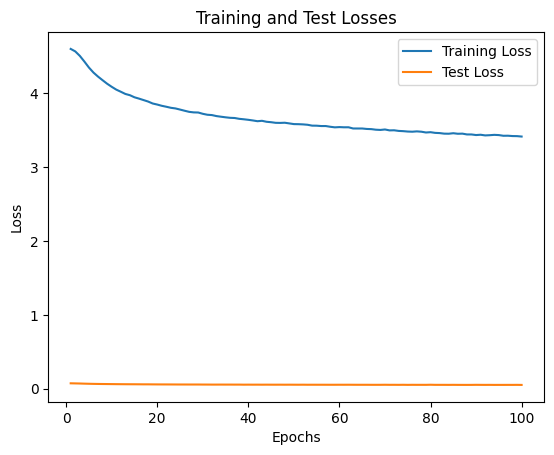

In [9]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer,epoch)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch, test_loss, test_accuracy))

plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Losses')
plt.show()

In [10]:
PATH = 'model_cnn.pth'
torch.save(model, PATH)